# NETFLIX STOCK PRICE PPREDICTION USING LSTM AND ANOTHER MODEL OF CHOICE

## PROBLEM STATEMENT

Accurately predicting Netflix’s future stock prices using historical data is challenging due to high market volatility and the influence of external business factors not captured in stock price alone. This project aims to develop and compare predictive models specifically LSTM (a deep learning model) and a traditional model like ARIMA or XGBoost to forecast Netflix’s stock closing price, evaluate their accuracy, and explore how incorporating external features (if available) can improve prediction reliability.

## OBJECTIVES

**Develop and Prediction Models**:

Build a a model using LSTM model to captures temporal dependencies in stock prices and ARIMA or XGBoost for comparision with a traditional statistical or machine learning model

**Evaluate Model Performance**:

Assess the model's accuracy and performance using appropriate evaluation metrics.

**Understand Key Features**:

Identify and analyze the key features that significantly impact Netflix prices.

**Improve Decision Making**:

Provide stakeholders with a reliable tool to estimate Netflix prices, enhancing their decision-making process.

## DATASET DESCRIPTION

Netflix Inc. (NFLX) Stock Price Data (2002-2025), containing: 

• Date 

• Open, High, Low, Close prices 

• Adjusted Close 

• Volume

## METHODOLOGY

**1. Data Preprocessing**

• Load and explore the dataset. 

• Handle missing values and perform data cleaning. 

• Perform feature scaling and normalization where necessary. 

**2. Feature Engineering** 

• Create new relevant features from the existing dataset. 

• Utilize lagged variables for time series forecasting. 

• Implement rolling statistics such as moving averages. 

**3. Hybrid Modeling Approach** 

• Develop an LSTM model to capture temporal dependencies in stock prices. 

• Additionally, students must implement another model (e.g., XGBoost, ARIMA, Random 
Forest) alongside LSTM for comparison. 

• Combine the models effectively for improved prediction accuracy. 

**4. Hyperparameter Optimization**

• Optmize model parameters. 

• Tune hyperparameters for both LSTM and the additional chosen model to improve 
performance. 

**5. Model Interpretability and Evaluation**

• Utilize SHAP values to interpret model decisions. 

• Evaluate model performance using metrics such as RMSE, MAE, and R-squared. 

• Compare the results of the hybrid model against standalone models. 

# **PART 1: DATA PREPROCESSING**

In [139]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Loading and explore the dataset.

In [140]:
# Loading the Netflix Stock Prices dataset
df = pd.read_csv('Netflix Inc. (NFLX) Stock Price 2002-2025.csv')

In [141]:
#Checking the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5729 non-null   object
 1   Open       5729 non-null   object
 2   High       5727 non-null   object
 3   Low        5727 non-null   object
 4   Close      5727 non-null   object
 5   Adj Close  5727 non-null   object
 6   Volume     5727 non-null   object
dtypes: object(7)
memory usage: 313.4+ KB


In [142]:
#Displaying the first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 25, 2025",989.4,994.4,955,977.24,977.24,"4,733,000"
1,"Feb 24, 2025","1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,"Feb 21, 2025","1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,"Feb 20, 2025","1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,"Feb 19, 2025","1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"


In [143]:
#Checking the Shape of the dataset
df.shape

(5729, 7)

In [144]:
#Displaying the Number of Columns in the dataset
df.columns

Index(['Date', 'Open ', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [145]:
#Checking if there is a Missing Value in the Dataset
df.isnull().sum()

Date         0
Open         0
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

# Handle missing values and perform data cleaning. 

In [146]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()
#Convert the relevant columns to numeric types
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[columns_to_convert] = df[columns_to_convert].replace({',': ''}, regex=True)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.fillna(method='ffill', inplace=True)

In [147]:
#convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [148]:
#Verify the data types after conversion
print(df.dtypes)
print(df.head())

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
        Date     Open     High      Low    Close  Adj Close     Volume
0 2025-02-25   989.40   994.40   955.00   977.24     977.24  4733000.0
1 2025-02-24  1008.00  1015.17   984.48   988.47     988.47  4426200.0
2 2025-02-21  1029.42  1032.38   999.39  1003.15    1003.15  3738700.0
3 2025-02-20  1042.00  1045.00  1015.59  1024.54    1024.54  3111800.0
4 2025-02-19  1035.18  1045.00  1024.51  1043.33    1043.33  2600000.0


In [149]:
#Droping the missing value
df.dropna

<bound method DataFrame.dropna of            Date     Open     High      Low    Close  Adj Close       Volume
0    2025-02-25   989.40   994.40   955.00   977.24     977.24    4733000.0
1    2025-02-24  1008.00  1015.17   984.48   988.47     988.47    4426200.0
2    2025-02-21  1029.42  1032.38   999.39  1003.15    1003.15    3738700.0
3    2025-02-20  1042.00  1045.00  1015.59  1024.54    1024.54    3111800.0
4    2025-02-19  1035.18  1045.00  1024.51  1043.33    1043.33    2600000.0
...         ...      ...      ...      ...      ...        ...          ...
5724 2002-05-30     1.11     1.11     1.07     1.07       1.07   10154200.0
5725 2002-05-29     1.16     1.16     1.09     1.10       1.10    6757800.0
5726 2002-05-28     1.21     1.23     1.16     1.16       1.16    6609400.0
5727 2002-05-24     1.21     1.23     1.20     1.21       1.21   11104800.0
5728 2002-05-23     1.16     1.24     1.15     1.20       1.20  104790000.0

[5729 rows x 7 columns]>

In [150]:
#Reinspecting the shape of the data frame after dropping the missing values
df.shape

(5729, 7)

In [151]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

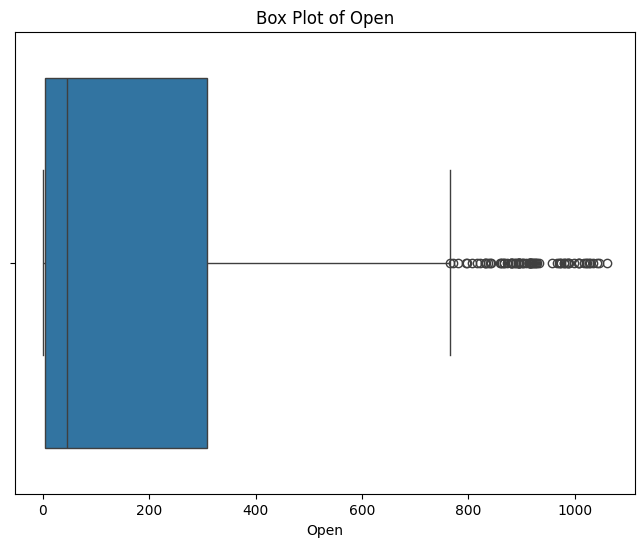

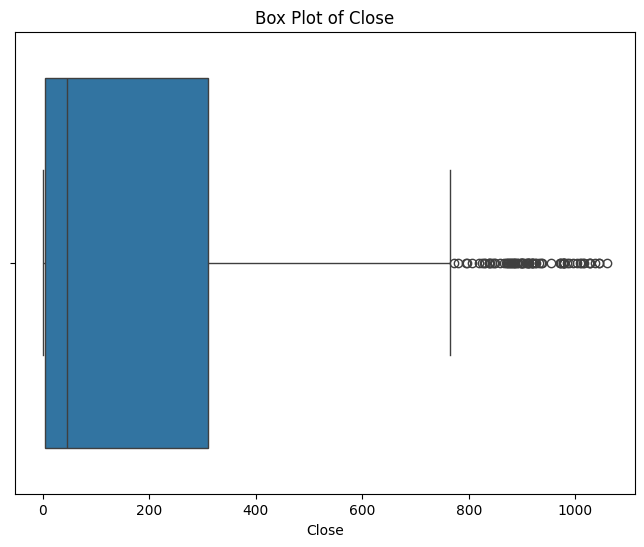

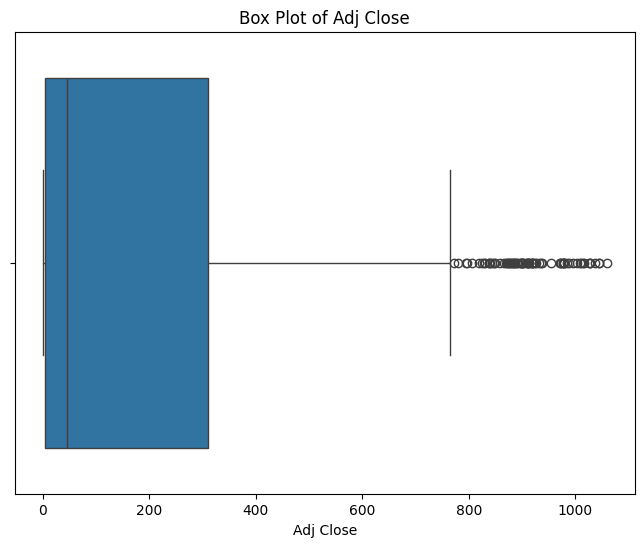

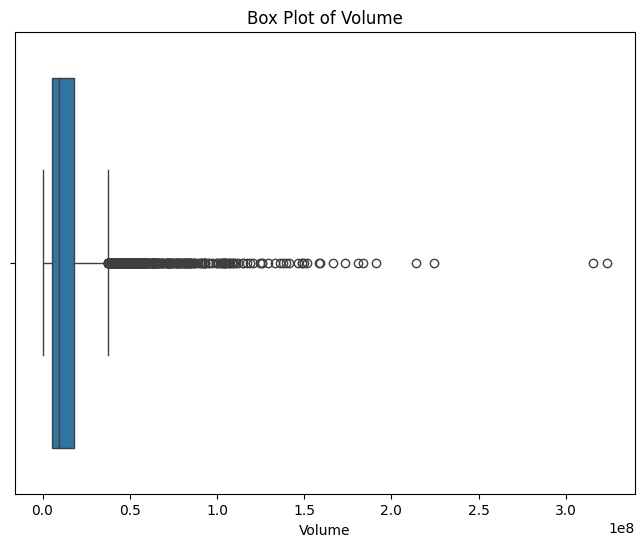

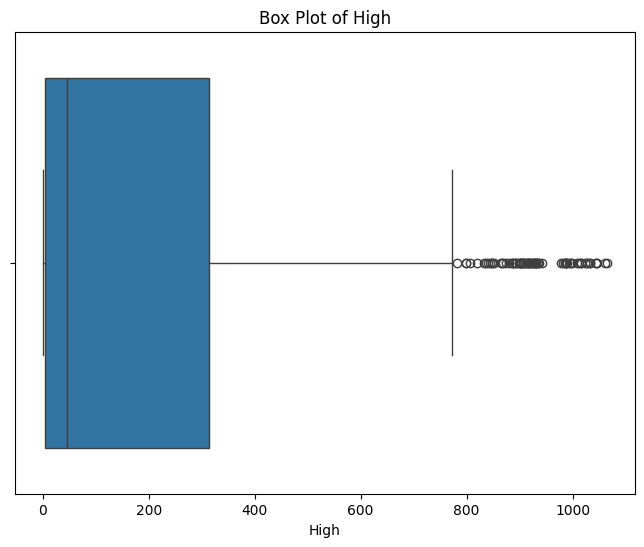

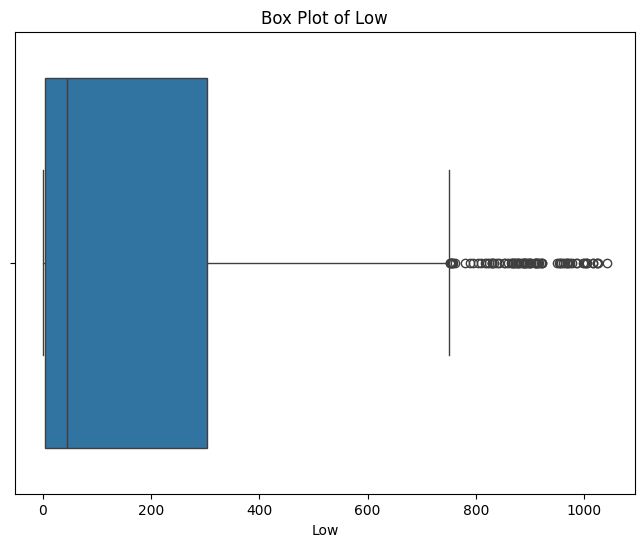

In [152]:
#Generates boxplots for column to visuliaze outliers
def check_outliers_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
check_outliers_boxplot(df,['Open','Close','Adj Close','Volume','High','Low'])       

In [153]:
# Calculate Q1, Q3, and IQR
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter outliers
df_filtered = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
print(f"Original DataFrame shape: {df.shape}")

print(f"DataFrame shape after removing outliers: {df_filtered.shape}")

Original DataFrame shape: (5729, 7)
DataFrame shape after removing outliers: (5328, 7)


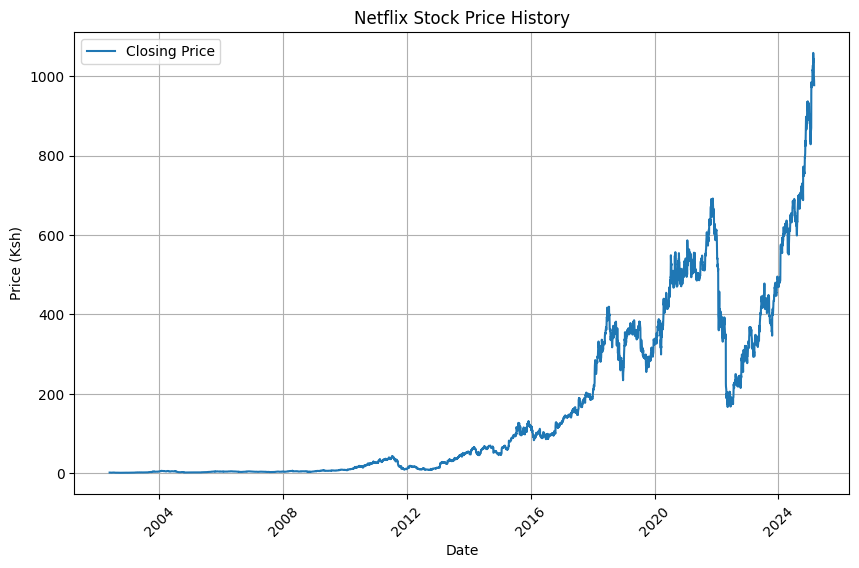

In [154]:
#Visualize Stock Price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Netflix Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (Ksh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

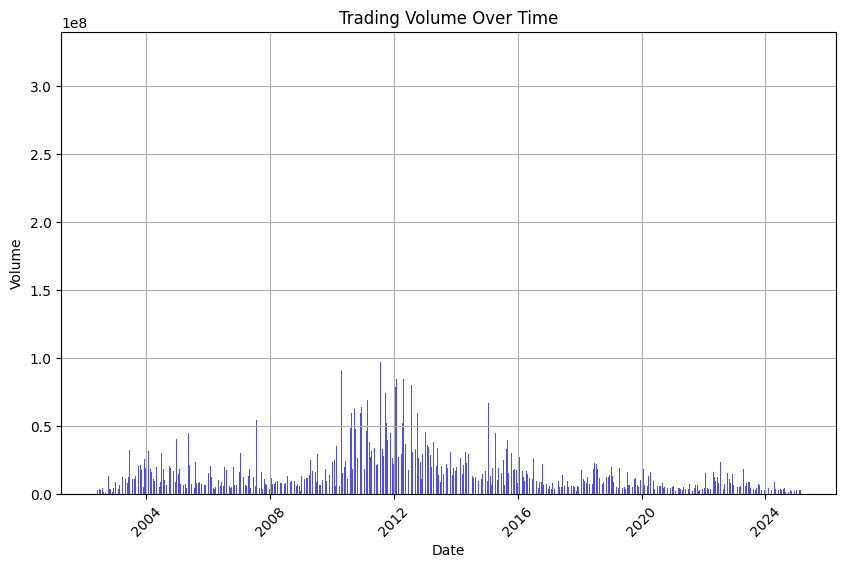

In [155]:
#Visualize Volume Analyis
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Performing feature scaling and normalization where necessary.

In [156]:
#Scales and normalizes numeric columns in a DataFram
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#mimax_scaler for LSTM
minmax_scaler =MinMaxScaler(feature_range=(0,1))
df_lstm = df.copy()
df_lstm[cols_to_scale] = minmax_scaler.fit_transform(df_lstm[cols_to_scale])

#Standard Scaling (for XGBoost, ARIMA, RF)
std_scaler = StandardScaler()
df_xgb = df.copy()
df_xgb[cols_to_scale] = std_scaler.fit_transform(df_xgb[cols_to_scale])

# Check the scaled data
print("LSTM Scaled Data Sample:")
print(df_lstm.head())

print("\nXGBoost/ARIMA/RF Scaled Data Sample:")
print(df_xgb.head())






LSTM Scaled Data Sample:
        Date      Open      High       Low     Close  Adj Close    Volume
0 2025-02-25  0.933372  0.934122  0.916751  0.923117   0.923117  0.013764
1 2025-02-24  0.950926  0.953641  0.945061  0.933729   0.933729  0.012814
2 2025-02-21  0.971141  0.969815  0.959379  0.947601   0.947601  0.010686
3 2025-02-20  0.983013  0.981674  0.974936  0.967814   0.967814  0.008746
4 2025-02-19  0.976577  0.981674  0.983502  0.985570   0.985570  0.007162

XGBoost/ARIMA/RF Scaled Data Sample:
        Date      Open      High       Low     Close  Adj Close    Volume
0 2025-02-25  3.885995  3.848028  3.787370  3.828842   3.828842 -0.572581
1 2025-02-24  3.973270  3.944228  3.927602  3.881537   3.881537 -0.589202
2 2025-02-21  4.073778  4.023939  3.998526  3.950420   3.950420 -0.626448
3 2025-02-20  4.132807  4.082390  4.075587  4.050788   4.050788 -0.660410
4 2025-02-19  4.100806  4.082390  4.118018  4.138957   4.138957 -0.688137


# PART 2. Feature Engineering

## Creating new relevant features from the existing dataset.

In [157]:
import pandas as pd

# Feature Engineering
def create_features(df):
    """
    Create technical indicators and statistical features
    """
    # Price movements
    df['Price_Range'] = df['High'] - df['Low']
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Moving averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    
    # Momentum indicators
    df['Momentum_5'] = df['Close'].diff(5)
    df['Momentum_10'] = df['Close'].diff(10)
    
    # Volatility
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()
    
    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Exponential Moving Average (EMA) with different windows
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    
    # Bollinger Bands (Upper and Lower Bands)
    df['Bollinger_Mean'] = df['Close'].rolling(window=20).mean()
    df['Bollinger_Upper'] = df['Bollinger_Mean'] + 2 * df['Close'].rolling(window=20).std()
    df['Bollinger_Lower'] = df['Bollinger_Mean'] - 2 * df['Close'].rolling(window=20).std()

    # Drop NA values from feature creation
    df = df.dropna()
    
    return df

# Sample data, assuming it's loaded as `data` DataFrame
# Example:
# data = pd.read_csv("your_dataset.csv")

# Apply feature engineering
df = create_features(df)

# Display the results
print(f"Dataset after feature engineering: {df.shape}")
display(df.tail())


Dataset after feature engineering: (5710, 23)


,Date,Open,High,Low,Close,Adj Close,Volume,Price_Range,Daily_Return,MA_5,...,Momentum_10,Volatility_5,Volatility_10,RSI,EMA_5,EMA_10,EMA_20,Bollinger_Mean,Bollinger_Upper,Bollinger_Lower
5724,2002-05-30,1.11,1.11,1.07,1.07,1.07,10154200.0,0.04,-0.009259,1.110,...,-0.01,0.033912,0.036286,61.538462,1.099327,1.097949,1.081815,1.0485,1.225406,0.871594
5725,2002-05-29,1.16,1.16,1.09,1.10,1.10,6757800.0,0.07,0.028037,1.100,...,0.01,0.025495,0.035340,68.627451,1.099551,1.098322,1.083547,1.0540,1.230086,0.877914
5726,2002-05-28,1.21,1.23,1.16,1.16,1.16,6609400.0,0.07,0.054545,1.108,...,0.01,0.037013,0.036225,71.428571,1.119701,1.109536,1.090828,1.0640,1.240325,0.887675
5727,2002-05-24,1.21,1.23,1.20,1.21,1.21,11104800.0,0.03,0.043103,1.124,...,0.05,0.059414,0.043919,70.370370,1.149800,1.127802,1.102178,1.0755,1.258628,0.892372
5728,2002-05-23,1.16,1.24,1.15,1.20,1.20,104790000.0,0.09,-0.008264,1.148,...,0.08,0.061400,0.048534,63.043478,1.166534,1.140929,1.111494,1.0865,1.271890,0.901110


## Utilizing lagged variables for time series forecasting. 

In [158]:
def create_lagged_features(df, columns, n_lags=5):
    """
    Create lagged features for the given columns.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of columns for which lagged features need to be created.
    n_lags (int): Number of lag periods (e.g., 1, 5, 10).
    
    Returns:
    pd.DataFrame: DataFrame with lagged features.
    """
    for col in columns:
        for lag in range(1, n_lags + 1):
            df[f'{col}_Lag_{lag}'] = df[col].shift(lag)
    
    # Drop the first n_lags rows as they will have NaN values due to shifting
    df = df.dropna()
    
    return df

# Define columns for which you want to create lagged features
columns_to_lag = ['Close', 'Open', 'High', 'Low', 'Volume']

# Apply the function to create lagged features
df_lagged = create_lagged_features(df, columns=columns_to_lag, n_lags=5)

# Display the shape of the dataset after adding lagged variables
print(f"Dataset shape after adding lagged features: {df_lagged.shape}")

# Display the first few rows to inspect the new features
print(df_lagged.head())


Dataset shape after adding lagged features: (5705, 48)
         Date    Open    High     Low   Close  Adj Close     Volume  \
24 2025-01-21  863.53  916.40  854.75  869.68     869.68  9851400.0   
25 2025-01-17  859.79  865.00  852.13  858.10     858.10  3617600.0   
26 2025-01-16  860.96  868.98  842.02  842.37     842.37  4028500.0   
27 2025-01-15  836.44  850.84  830.41  848.26     848.26  3181400.0   
28 2025-01-14  843.20  844.89  823.52  828.40     828.40  3037700.0   

    Price_Range  Daily_Return     MA_5  ...  Low_Lag_1  Low_Lag_2  Low_Lag_3  \
24        61.65     -0.088376  951.602  ...     950.76     953.90     967.68   
25        12.87     -0.013315  928.844  ...     854.75     950.76     953.90   
26        26.96     -0.018331  901.800  ...     852.13     854.75     950.76   
27        20.43      0.006992  874.480  ...     842.02     852.13     854.75   
28        21.37     -0.023413  849.362  ...     830.41     842.02     852.13   

    Low_Lag_4  Low_Lag_5  Volume_Lag_

## Implementing rolling statistics such as moving averages.

In [159]:
def create_rolling_statistics(df, columns, window_sizes=[5, 10, 20]):
    """
    Create rolling statistics such as moving averages and rolling standard deviation.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of columns for which rolling statistics need to be created.
    window_sizes (list): List of window sizes for rolling calculations (e.g., 5, 10, 20).
    
    Returns:
    pd.DataFrame: DataFrame with rolling statistics.
    """
    for col in columns:
        for window in window_sizes:
            # Calculate moving averages
            df[f'{col}_MA_{window}'] = df[col].rolling(window=window).mean()
            # Calculate rolling standard deviation
            df[f'{col}_STD_{window}'] = df[col].rolling(window=window).std()
    
    # Drop NaN values resulting from the rolling operation
    df = df.dropna()
    
    return df

# Define columns for which you want to create rolling statistics
columns_to_rolling = ['Close', 'Open', 'High', 'Low', 'Volume']

# Apply the function to create rolling statistics (moving averages and standard deviation)
df_rolling = create_rolling_statistics(df, columns=columns_to_rolling, window_sizes=[5, 10, 20])

# Display the shape of the dataset after adding rolling statistics
print(f"Dataset shape after adding rolling statistics: {df_rolling.shape}")

# Display the first few rows to inspect the new features
print(df_rolling.head())


Dataset shape after adding rolling statistics: (5691, 78)
         Date    Open    High     Low   Close  Adj Close     Volume  \
38 2024-12-27  916.01  918.13  894.50  907.55     907.55  3226200.0   
39 2024-12-26  928.40  930.49  915.30  924.14     924.14  2340300.0   
40 2024-12-24  915.00  935.85  911.70  932.12     932.12  2320300.0   
41 2024-12-23  913.42  915.00  899.10  911.45     911.45  2339400.0   
42 2024-12-20  893.21  919.92  890.49  909.05     909.05  4530500.0   

    Price_Range  Daily_Return     MA_5  ...  Low_MA_10  Low_STD_10  Low_MA_20  \
38        23.63      0.007907  893.416  ...    870.791   22.255881   885.0320   
39        15.19      0.018280  902.034  ...    879.407   20.980967   882.9320   
40        24.15      0.008635  911.112  ...    887.137   16.266829   880.5040   
41        15.90     -0.022175  915.138  ...    889.747   15.834650   877.0750   
42        29.43     -0.002633  916.862  ...    891.885   14.085379   873.9045   

    Low_STD_20  Volume_MA_5 

# PART 3. Hybrid Modeling Approach

## Develop an LSTM model to capture temporal dependencies in stock prices. 